# Wedding Game Data Processing

Hi! I see you've found my little nerd den!

What you'll find down here is the data I put out for my wedding processed and visualised.

As I'm writing this I don't know what exactly is the processing, but it will be fun, so hop along for the ride!

## 0) Importing stuff

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
import networkx as nx
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [2]:
fr = pd.read_csv('FR.csv', parse_dates=['Horodateur'], dtype=str)
print(fr.dtypes)
fr.head()

Horodateur                                                              datetime64[ns]
Quelles langues parles-tu? (Cocher toutes les langues que tu parles)            object
Genre                                                                           object
Age (en ans)                                                                    object
Taille (en cm)                                                                  object
Poids (en Kg)                                                                   object
Quelle est la distance tu vas parcourir pour rejoindre le mariage?              object
Comment qualifies-tu ta relation avec: [Abed Alrahman]                          object
Comment qualifies-tu ta relation avec: [Dania]                                  object
dtype: object


,Horodateur,Quelles langues parles-tu? (Cocher toutes les langues que tu parles),Genre,Age (en ans),Taille (en cm),Poids (en Kg),Quelle est la distance tu vas parcourir pour rejoindre le mariage?,Comment qualifies-tu ta relation avec: [Abed Alrahman],Comment qualifies-tu ta relation avec: [Dania]
0,2021-06-16 13:07:19,"Anglais, Français",Mâle,24,193,70,201+ Km,Ami proche,Ami
1,2021-06-16 13:09:30,"Français, Arabe",Femelle,25,170,65,201+ Km,Ami,Ami
2,2021-06-16 14:12:47,"Anglais, Français, Arabe",Mâle,23,172,75,201+ Km,Ami proche,Qui?
3,2021-06-16 20:40:55,"Anglais, Français, Arabe, chinois, allemand",Mâle,48,180,70,101-200 Km,Famille,Connaissance
4,2021-06-17 23:15:18,"Anglais, Français",Mâle,26,170,60,201+ Km,Qui?,Qui?


In [3]:
en = pd.read_csv('EN.csv', parse_dates=['Horodateur'], dtype=str)
print(en.dtypes)
en.head()

Horodateur                                                       datetime64[ns]
What language do you speak? (Check all that apply)                       object
Gender?                                                                  object
Age (in years)                                                           object
Height (in cm)                                                           object
Weight (in kg)                                                           object
How far would you have to come to join the wedding?                      object
How would you qualify your relationship with: [Abed Alrahman]            object
How would you qualify your relationship with: [Dania]                    object
dtype: object


,Horodateur,What language do you speak? (Check all that apply),Gender?,Age (in years),Height (in cm),Weight (in kg),How far would you have to come to join the wedding?,How would you qualify your relationship with: [Abed Alrahman],How would you qualify your relationship with: [Dania]
0,2021-12-06 08:27:19,Arabic,Male,53,176,110,201+ Km,Family,Family
1,2021-12-06 09:03:43,Arabic,Male,11,143,32,201+ Km,Family,Family
2,2021-12-06 10:21:15,French,Female,26,160,69,1-10 Km,Who?,Family
3,2021-12-06 10:26:56,"English, French",Female,26,163,56,11-30 Km,Who?,Close Friend
4,2021-12-06 13:18:53,"English, French, Arabic",Female,26,170,55,1-10 Km,Who?,Close Friend


In [4]:
ar = pd.read_csv('AR.csv', parse_dates=['Horodateur'], dtype=str)
print(ar.dtypes)
ar.head()

Horodateur                                        datetime64[ns]
أي اللغات تتكلم؟ (اختر كل اللغات التي تتكلمها)            object
الجنس؟                                                    object
العمر (بالسنة)                                            object
الطول (بالسنتيمتر)                                        object
الوزن (بالكيلوجرام)                                       object
ما هي المسافة التي ستقطعها لحضور الزفاف؟                  object
كيف تصف علاقتك بـ: [عبد الرحمن]                           object
كيف تصف علاقتك بـ: [دانية]                                object
dtype: object


,Horodateur,أي اللغات تتكلم؟ (اختر كل اللغات التي تتكلمها),الجنس؟,العمر (بالسنة),الطول (بالسنتيمتر),الوزن (بالكيلوجرام),ما هي المسافة التي ستقطعها لحضور الزفاف؟,كيف تصف علاقتك بـ: [عبد الرحمن],كيف تصف علاقتك بـ: [دانية]
0,2021-06-15 22:53:42,"الانجليزية, الفرنسية, العربية",أنثى,55,166,66,201+ Km,من العائلة,من العائلة
1,2021-06-15 23:00:19,العربية,ذكر,54,167,82,201+ Km,من العائلة,من العائلة
2,2021-06-16 14:04:03,"الانجليزية, العربية",ذكر,36,10000,10000,201+ Km,من العائلة,من العائلة
3,2021-06-16 14:20:32,"الانجليزية, العربية, الماني",ذكر,24,176,ما حزرت,201+ Km,من هذا؟,معرفة
4,2021-06-16 19:55:40,العربية,أنثى,85,156,65,201+ Km,من العائلة,من العائلة


## 1) Cleaning and Preprocessing

Map all column names to english to process them together

In [5]:
std_cols = ['timestamp', 'lang', 'gender', 'age', 'height', 'weight', 'distance', 'relation_abed', 'relation_dania']
num_cols = ['age', 'height', 'weight']
en.columns = std_cols
fr.columns = std_cols
ar.columns = std_cols
ar.head()

,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania
0,2021-06-15 22:53:42,"الانجليزية, الفرنسية, العربية",أنثى,55,166,66,201+ Km,من العائلة,من العائلة
1,2021-06-15 23:00:19,العربية,ذكر,54,167,82,201+ Km,من العائلة,من العائلة
2,2021-06-16 14:04:03,"الانجليزية, العربية",ذكر,36,10000,10000,201+ Km,من العائلة,من العائلة
3,2021-06-16 14:20:32,"الانجليزية, العربية, الماني",ذكر,24,176,ما حزرت,201+ Km,من هذا؟,معرفة
4,2021-06-16 19:55:40,العربية,أنثى,85,156,65,201+ Km,من العائلة,من العائلة


### 1.1) Clean Numeric Columns

In [6]:
def clean_nums(x: str):
    if x.isnumeric():
        return x
    else:
        nums = re.findall(r'[0-9]+', x)
        if nums:
            return nums[0]
        else:
            return np.nan

In [7]:
en[num_cols] = en[num_cols].applymap(clean_nums).apply(pd.to_numeric, axis=1)
print(en.dtypes)
en.head()

timestamp         datetime64[ns]
lang                      object
gender                    object
age                        int64
height                     int64
weight                     int64
distance                  object
relation_abed             object
relation_dania            object
dtype: object


,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania
0,2021-12-06 08:27:19,Arabic,Male,53,176,110,201+ Km,Family,Family
1,2021-12-06 09:03:43,Arabic,Male,11,143,32,201+ Km,Family,Family
2,2021-12-06 10:21:15,French,Female,26,160,69,1-10 Km,Who?,Family
3,2021-12-06 10:26:56,"English, French",Female,26,163,56,11-30 Km,Who?,Close Friend
4,2021-12-06 13:18:53,"English, French, Arabic",Female,26,170,55,1-10 Km,Who?,Close Friend


In [8]:
fr[num_cols] = fr[num_cols].applymap(clean_nums).apply(pd.to_numeric, axis=1)
print(fr.dtypes)
fr.head()

timestamp         datetime64[ns]
lang                      object
gender                    object
age                      float64
height                   float64
weight                   float64
distance                  object
relation_abed             object
relation_dania            object
dtype: object


,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania
0,2021-06-16 13:07:19,"Anglais, Français",Mâle,24.0,193.0,70.0,201+ Km,Ami proche,Ami
1,2021-06-16 13:09:30,"Français, Arabe",Femelle,25.0,170.0,65.0,201+ Km,Ami,Ami
2,2021-06-16 14:12:47,"Anglais, Français, Arabe",Mâle,23.0,172.0,75.0,201+ Km,Ami proche,Qui?
3,2021-06-16 20:40:55,"Anglais, Français, Arabe, chinois, allemand",Mâle,48.0,180.0,70.0,101-200 Km,Famille,Connaissance
4,2021-06-17 23:15:18,"Anglais, Français",Mâle,26.0,170.0,60.0,201+ Km,Qui?,Qui?


In [9]:
ar[num_cols] = ar[num_cols].applymap(clean_nums).apply(pd.to_numeric, axis=1)
print(ar.dtypes)
ar.head()

timestamp         datetime64[ns]
lang                      object
gender                    object
age                      float64
height                   float64
weight                   float64
distance                  object
relation_abed             object
relation_dania            object
dtype: object


,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania
0,2021-06-15 22:53:42,"الانجليزية, الفرنسية, العربية",أنثى,55.0,166.0,66.0,201+ Km,من العائلة,من العائلة
1,2021-06-15 23:00:19,العربية,ذكر,54.0,167.0,82.0,201+ Km,من العائلة,من العائلة
2,2021-06-16 14:04:03,"الانجليزية, العربية",ذكر,36.0,10000.0,10000.0,201+ Km,من العائلة,من العائلة
3,2021-06-16 14:20:32,"الانجليزية, العربية, الماني",ذكر,24.0,176.0,NaN,201+ Km,من هذا؟,معرفة
4,2021-06-16 19:55:40,العربية,أنثى,85.0,156.0,65.0,201+ Km,من العائلة,من العائلة


### 1.2) Map all Values to Uniform Tokens
Starting with language values

In [10]:
ar_dict = {'العربية':'ar',
           'الانجليزية':'en',
           'الفرنسية':'fr',
           'الماني':'de',
           'الالمانية':'de',
           'الألمانية':'de',
           'Italiano':'it'}

en_dict = {'Arabic':'ar',
           'English':'en',
           'French':'fr'}

fr_dict = {'Arabe':'ar',
           'Anglais':'en',
           'Français':'fr',
           'turc':'tr',
           'chinois':'cn',
           'allemand':'de',
           'Allemand':'de',
           'Farsi':'fa'}

def clean_lang(x: str, user_lang='ar'):
    langs = pd.Series([s.strip() for s in x.split(',')])
    if user_lang == 'fr':
        mapped = langs.map(fr_dict)
        return mapped.values.tolist()
    elif user_lang == 'en':
        mapped = langs.map(en_dict)
        return mapped.values.tolist()
    else:
        mapped = langs.map(ar_dict)
        return mapped.values.tolist()

In [11]:
en['lang'] = en.lang.apply(clean_lang, user_lang='en')
en.lang

0            [ar]
1            [ar]
2            [fr]
3        [en, fr]
4    [en, fr, ar]
5    [en, fr, ar]
6            [ar]
7            [fr]
Name: lang, dtype: object

In [12]:
fr['lang'] = fr.lang.apply(clean_lang, user_lang='fr')
fr.lang

0                 [en, fr]
1                 [fr, ar]
2             [en, fr, ar]
3     [en, fr, ar, cn, de]
4                 [en, fr]
5                     [fr]
6             [en, fr, ar]
7                     [fr]
8                     [tr]
9             [en, fr, ar]
10        [en, fr, de, ar]
11        [en, fr, ar, de]
12            [en, de, fa]
13                [en, fr]
14                [fr, ar]
15            [en, fr, ar]
16            [en, fr, ar]
17            [en, fr, ar]
18            [en, fr, ar]
19                [en, fr]
Name: lang, dtype: object

In [13]:
ar['lang'] = ar.lang.apply(clean_lang, user_lang='ar')
ar.lang

0     [en, fr, ar]
1             [ar]
2         [en, ar]
3     [en, ar, de]
4             [ar]
5         [ar, it]
6         [en, ar]
7         [en, ar]
8         [fr, ar]
9         [fr, ar]
10        [en, ar]
11    [en, fr, ar]
12        [fr, ar]
13        [fr, ar]
14        [fr, ar]
15    [en, ar, de]
16    [en, ar, de]
17        [fr, ar]
18    [en, fr, ar]
19        [en, ar]
20    [en, fr, ar]
21            [ar]
22    [en, fr, ar]
23    [en, fr, ar]
24            [ar]
25            [ar]
Name: lang, dtype: object

The rest should be easier since we're just using categorical dummies

In [14]:
en['gender'] = en.gender.map({'Male':'M', 'Female':'F'})
fr['gender'] = fr.gender.map({'Mâle':'M', 'Femelle':'F'})
ar['gender'] = ar.gender.map({'ذكر':'M', 'أنثى':'F'})
ar.gender

0     F
1     M
2     M
3     M
4     F
5     F
6     M
7     F
8     F
9     F
10    M
11    M
12    F
13    F
14    M
15    M
16    M
17    F
18    F
19    F
20    F
21    F
22    F
23    F
24    F
25    F
Name: gender, dtype: object

In [15]:
discrete_cols = ['relation_abed', 'relation_dania', 'distance']
ar_rel_map = {'من هذا؟':0,
              'معرفة':1,
              'صديق':2,
              'صديق مقرب':3,
              'من العائلة':4}

en_rel_map = {'Who?':0,
              'Acquaintance':1,
              'Friend':2,
              'Close Friend':3,
              'Family':4}

fr_rel_map = {'Qui?':0,
              'Connaissance':1,
              'Ami':2,
              'Ami proche':3,
              'Famille':4}

distance_map = {'1-10 Km':0,
                '11-30 Km':1,
                '31-50 Km':2,
                '51-100 Km':3,
                '101-200 Km':4,
                '201+ Km':5}

In [16]:
ar['relation_abed_num'] = ar.relation_abed.map(ar_rel_map)
ar['relation_dania_num'] = ar.relation_dania.map(ar_rel_map)
ar['distance_num'] = ar.distance.map(distance_map)

ar.head()

,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania,relation_abed_num,relation_dania_num,distance_num
0,2021-06-15 22:53:42,"[en, fr, ar]",F,55.0,166.0,66.0,201+ Km,من العائلة,من العائلة,4,4,5
1,2021-06-15 23:00:19,[ar],M,54.0,167.0,82.0,201+ Km,من العائلة,من العائلة,4,4,5
2,2021-06-16 14:04:03,"[en, ar]",M,36.0,10000.0,10000.0,201+ Km,من العائلة,من العائلة,4,4,5
3,2021-06-16 14:20:32,"[en, ar, de]",M,24.0,176.0,NaN,201+ Km,من هذا؟,معرفة,0,1,5
4,2021-06-16 19:55:40,[ar],F,85.0,156.0,65.0,201+ Km,من العائلة,من العائلة,4,4,5


In [17]:
en['relation_abed'] = en.relation_abed.map(en_rel_map)
en['relation_dania'] = en.relation_dania.map(en_rel_map)
en['distance'] = en.distance.map(distance_map)

fr['relation_abed'] = fr.relation_abed.map(fr_rel_map)
fr['relation_dania'] = fr.relation_dania.map(fr_rel_map)
fr['distance'] = fr.distance.map(distance_map)

fr.head()

,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania
0,2021-06-16 13:07:19,"[en, fr]",M,24.0,193.0,70.0,5,3,2
1,2021-06-16 13:09:30,"[fr, ar]",F,25.0,170.0,65.0,5,2,2
2,2021-06-16 14:12:47,"[en, fr, ar]",M,23.0,172.0,75.0,5,3,0
3,2021-06-16 20:40:55,"[en, fr, ar, cn, de]",M,48.0,180.0,70.0,4,4,1
4,2021-06-17 23:15:18,"[en, fr]",M,26.0,170.0,60.0,5,0,0


## 1.3) MERGE

In [18]:
df = pd.concat([en, fr, ar], axis=0)
print(df.shape)
df.head()

(54, 12)


,timestamp,lang,gender,age,height,weight,distance,relation_abed,relation_dania,relation_abed_num,relation_dania_num,distance_num
0,2021-12-06 08:27:19,[ar],M,53.0,176.0,110.0,5,4,4,NaN,NaN,NaN
1,2021-12-06 09:03:43,[ar],M,11.0,143.0,32.0,5,4,4,NaN,NaN,NaN
2,2021-12-06 10:21:15,[fr],F,26.0,160.0,69.0,0,0,4,NaN,NaN,NaN
3,2021-12-06 10:26:56,"[en, fr]",F,26.0,163.0,56.0,1,0,3,NaN,NaN,NaN
4,2021-12-06 13:18:53,"[en, fr, ar]",F,26.0,170.0,55.0,0,0,3,NaN,NaN,NaN


## 2) Processing
### 2.1) Participation Rate

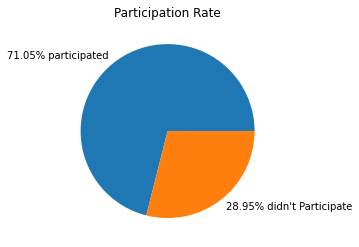

In [19]:
plt.pie(x=[df.shape[0], 76-df.shape[0]], labels=[f'{100*df.shape[0]/76:.2f}% participated', f'{100 * (76 - df.shape[0]) / 76:.2f}% didn\'t Participate'])
plt.title('Participation Rate')
plt.savefig('figures/participation.pdf')
plt.show()

### 2.2) Language Distribution

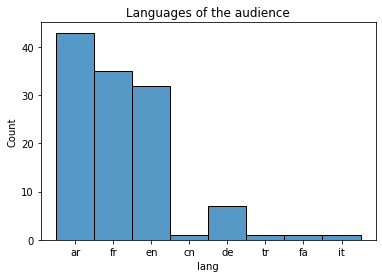

In [20]:
sns.histplot(data=df.explode('lang'),x='lang')
plt.title('Languages of the audience')
plt.savefig('figures/langs.pdf')
plt.show()

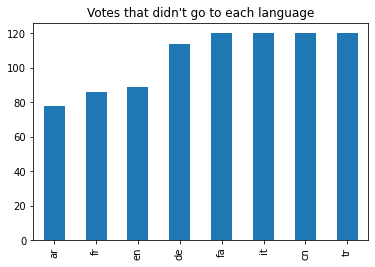

In [21]:
nb_votes = df.lang.explode().shape[0]
(nb_votes - df.lang.explode().value_counts()).plot.bar(title='Votes that didn\'t go to each language' )
plt.savefig('figures/langs_neg.pdf')
plt.show()

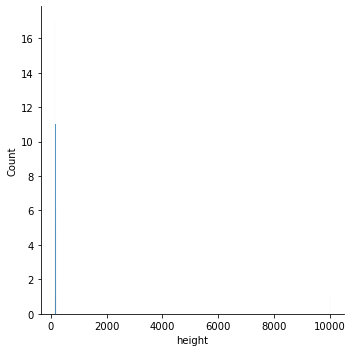

In [22]:
#fig, axs = plt.subplots(3, 1)
sns.displot(data=df, x='height')
plt.savefig('figures/height_scuffed.pdf')
plt.show()

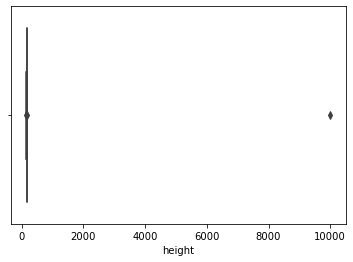

In [23]:
sns.boxplot(data=df, x='height')
plt.show()

Some funny guy, let's chop him down

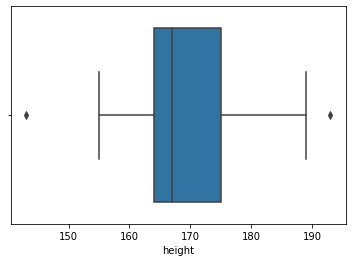

In [24]:
df.loc[df['height'] > 250, num_cols] = df[num_cols].mean(0)
sns.boxplot(data=df, x='height')
plt.show()

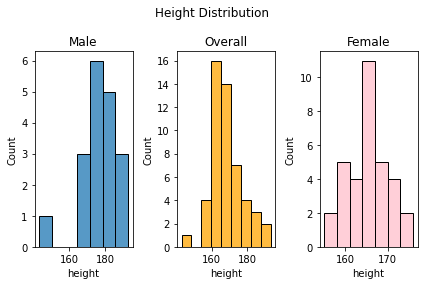

In [25]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Height Distribution')
sns.histplot(data=df, x='height', ax=axs[1], color='orange')
axs[1].set_title('Overall')
sns.histplot(data=df[df.gender=='M'],x='height',  ax=axs[0] )
axs[0].set_title('Male')
sns.histplot(data=df[df.gender=='F'], x='height', ax=axs[2], color='pink')
axs[2].set_title('Female')
plt.tight_layout()
plt.savefig('figures/height.pdf')
plt.show()

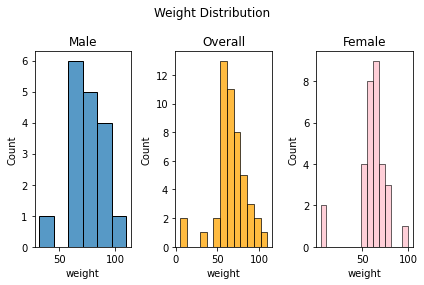

In [26]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Weight Distribution')
sns.histplot(data=df, x='weight', ax=axs[1], color='orange')
axs[1].set_title('Overall')
sns.histplot(data=df[df.gender=='M'],x='weight',  ax=axs[0] )
axs[0].set_title('Male')
sns.histplot(data=df[df.gender=='F'], x='weight', ax=axs[2], color='pink')
axs[2].set_title('Female')
plt.tight_layout()
plt.savefig('figures/weight.pdf')
plt.show()

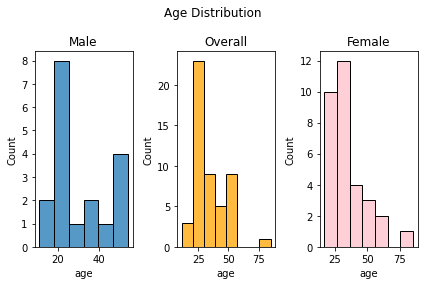

In [27]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Age Distribution')
sns.histplot(data=df, x='age', ax=axs[1], color='orange')
axs[1].set_title('Overall')
sns.histplot(data=df[df.gender=='M'],x='age',  ax=axs[0] )
axs[0].set_title('Male')
sns.histplot(data=df[df.gender=='F'], x='age', ax=axs[2], color='pink')
axs[2].set_title('Female')
plt.tight_layout()
plt.savefig('figures/age.pdf')
plt.show()

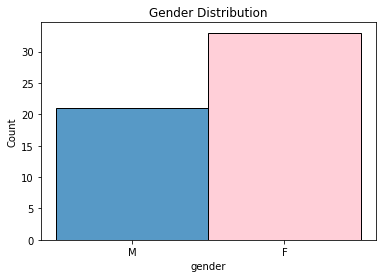

In [28]:
fig, ax = plt.subplots(1,1)
sns.histplot(data=df[df.gender == 'M'], x='gender', ax=ax)
sns.histplot(data=df[df.gender == 'F'], x='gender', ax=ax, color='pink')
plt.title('Gender Distribution')
plt.show()

In [29]:
df[df.weight > 20].mean(0)

C:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


age                    34.369565
height                168.804348
weight                 68.869565
relation_abed_num       2.545455
relation_dania_num      2.181818
distance_num            3.409091
dtype: float64

In [30]:
df[df.gender=='M'].mean(0)

C:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


age                    31.500000
height                176.333333
weight                 75.764706
relation_abed_num       2.777778
relation_dania_num      1.666667
distance_num            4.444444
dtype: float64

In [31]:
df[np.logical_and(df.gender=='F', df.weight > 20)].mean(0)

C:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


age                    35.793103
height                164.379310
weight                 64.827586
relation_abed_num       2.333333
relation_dania_num      2.533333
distance_num            3.000000
dtype: float64